In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P2\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
819,2020-06-29,United Kingdom,311954.0,311151.0,43737.0,43550.0,803.0,187.0
820,2020-06-29,Germany,194223.0,193761.0,8973.0,8961.0,462.0,12.0
821,2020-06-29,Iran,223249.0,222669.0,10379.0,10508.0,580.0,-129.0
822,2020-06-29,Turkey,197175.0,197239.0,5100.0,5097.0,-64.0,3.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  2516.46359223301
RMSE =  5950.755058561081


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.9660194174757
RMSE =  735.0123372585865


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAPE =  12671.012345679012
RMSE =  15841.480347648647
-- World performances for deaths --
MAPE =  1617.4444444444443
RMSE =  1969.4423883393122


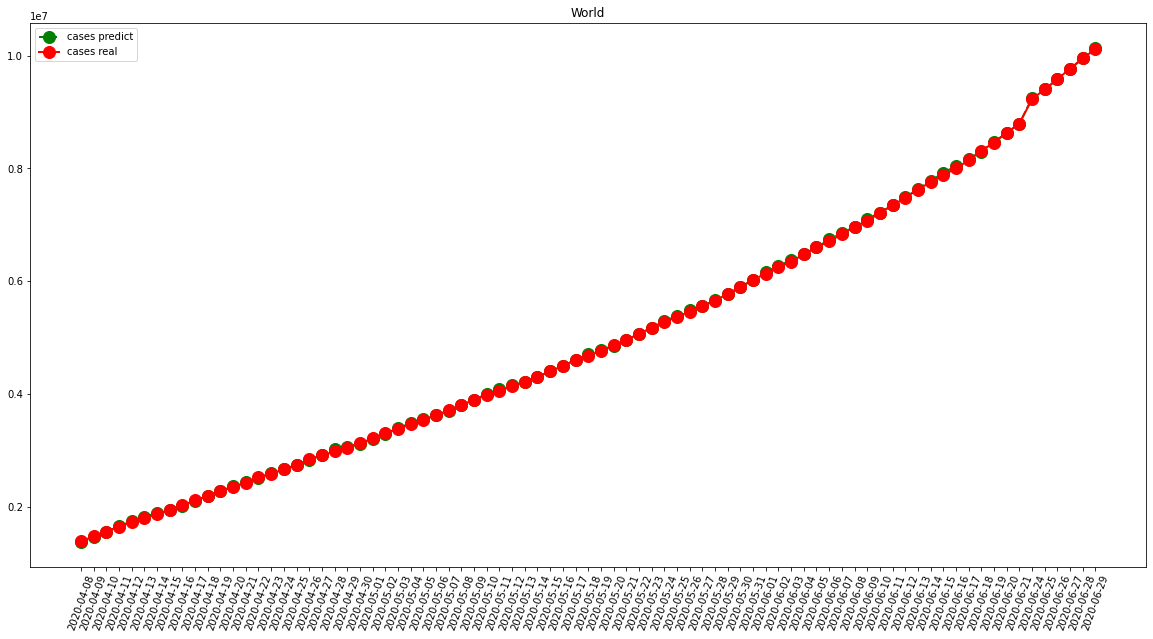

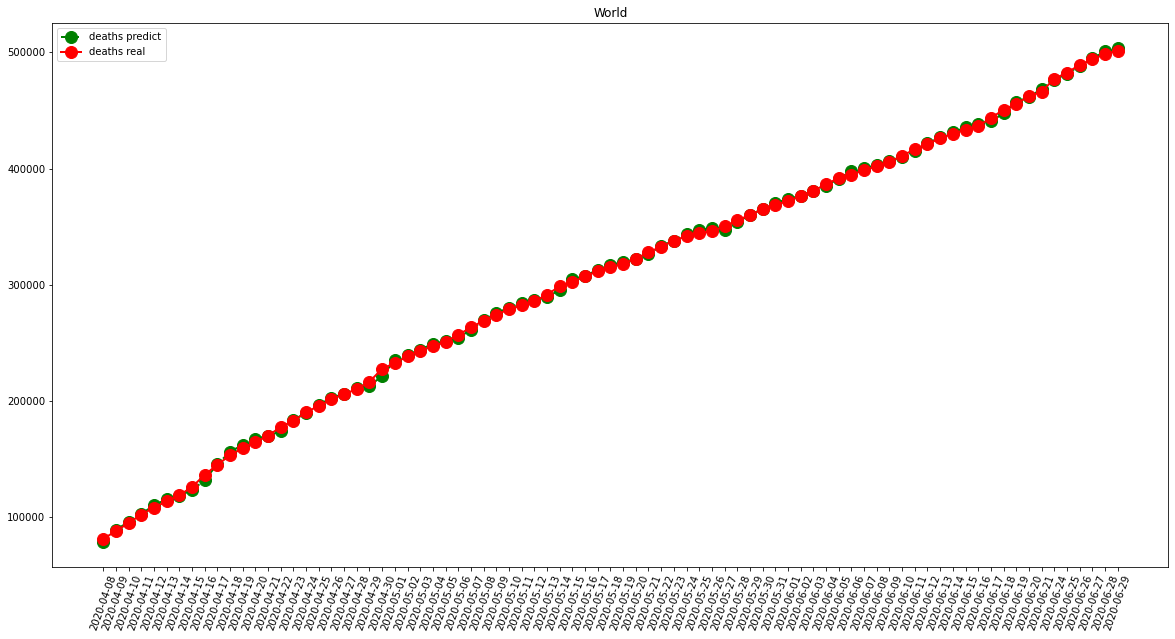

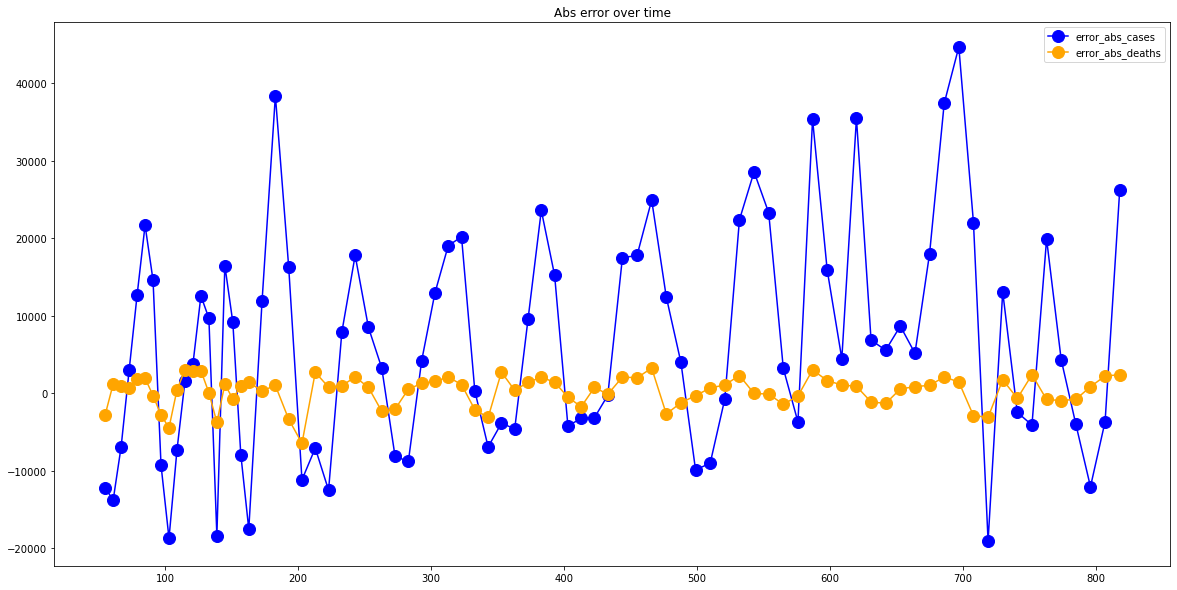

In [7]:
visShow("World")

-- France performances for cases --
MAPE =  909.8021978021978
RMSE =  1504.1901402488909
-- France performances for deaths --
MAPE =  192.36263736263737
RMSE =  351.07635123375144


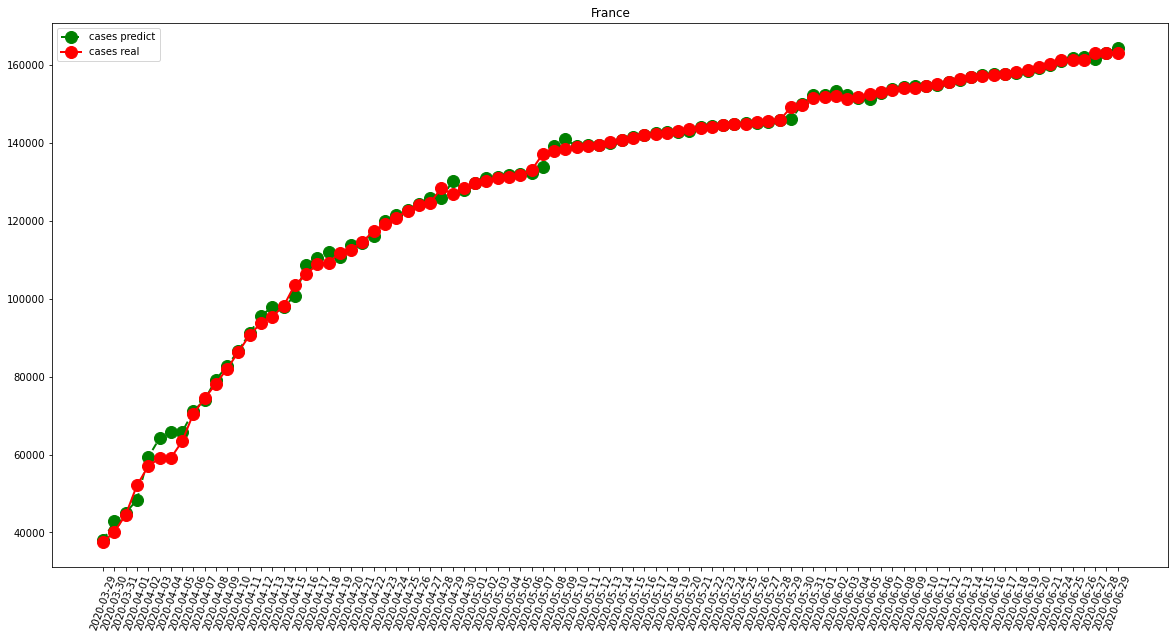

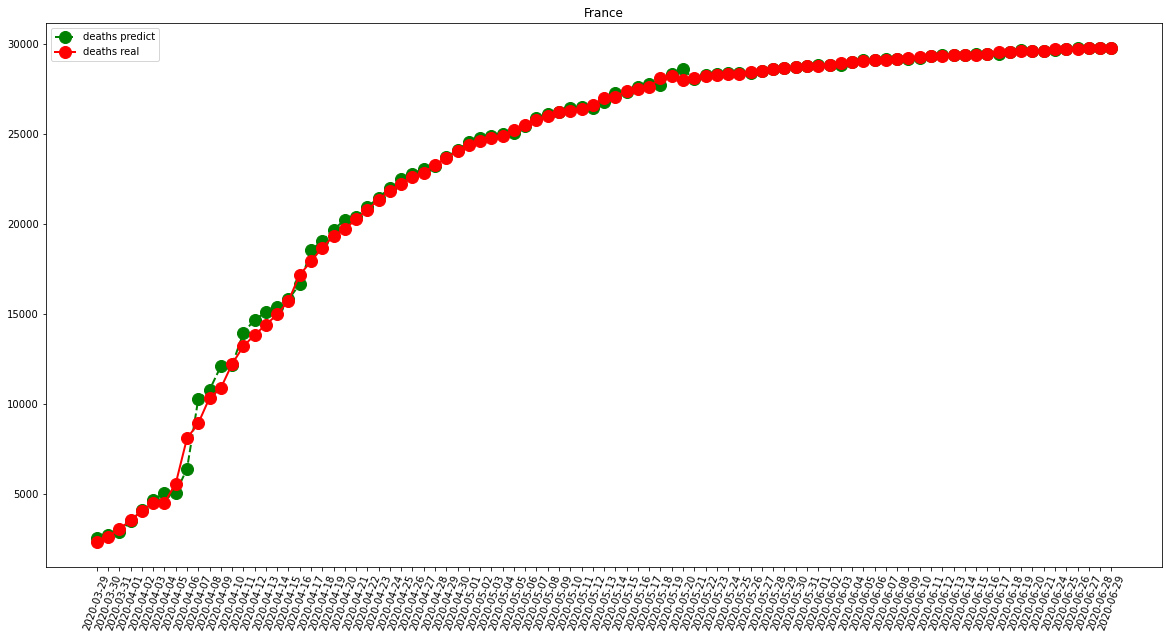

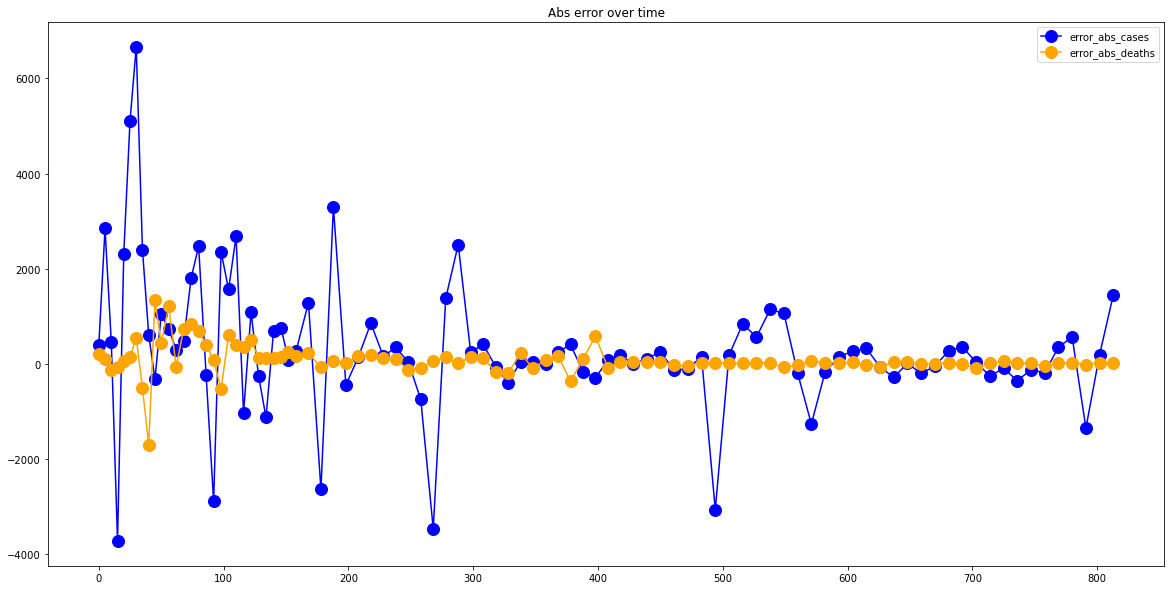

In [8]:
visShow("France")

-- Italy performances for cases --
MAPE =  395.64835164835165
RMSE =  566.9315325833999
-- Italy performances for deaths --
MAPE =  104.75824175824175
RMSE =  309.90251923560004


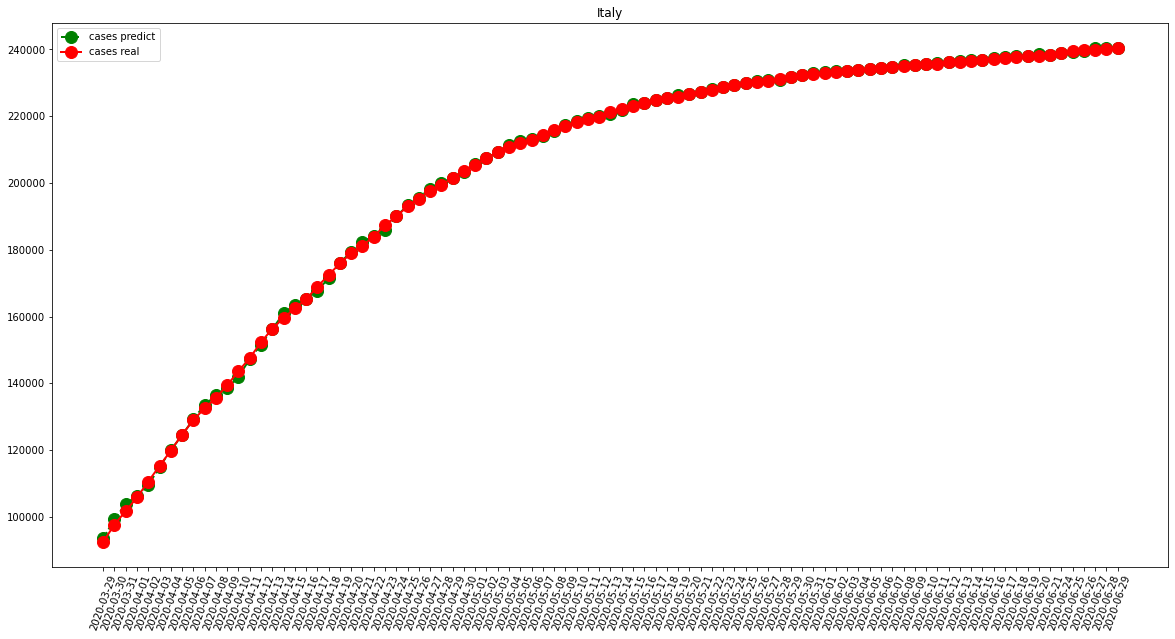

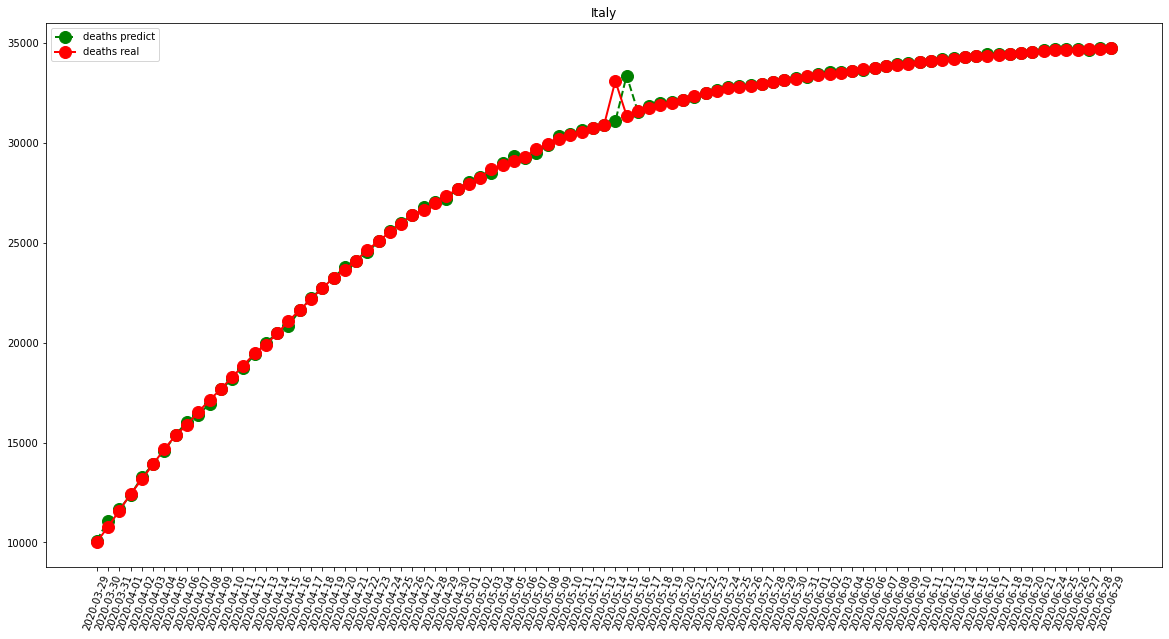

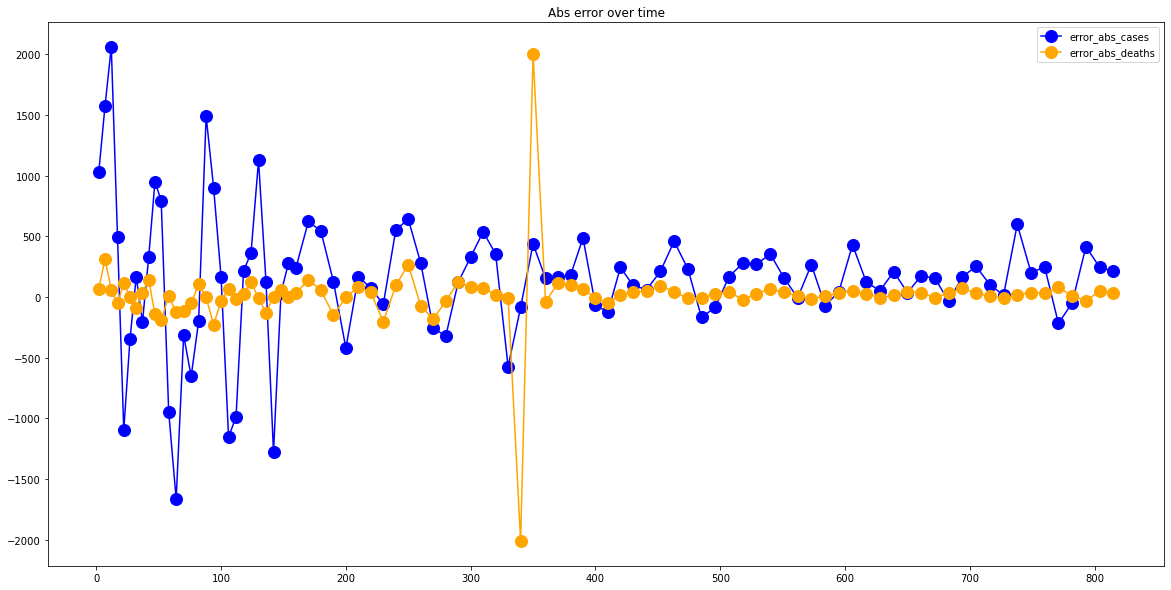

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAPE =  903.7362637362637
RMSE =  2142.04512526728
-- Spain performances for deaths --
MAPE =  197.93406593406593
RMSE =  425.45301002139325


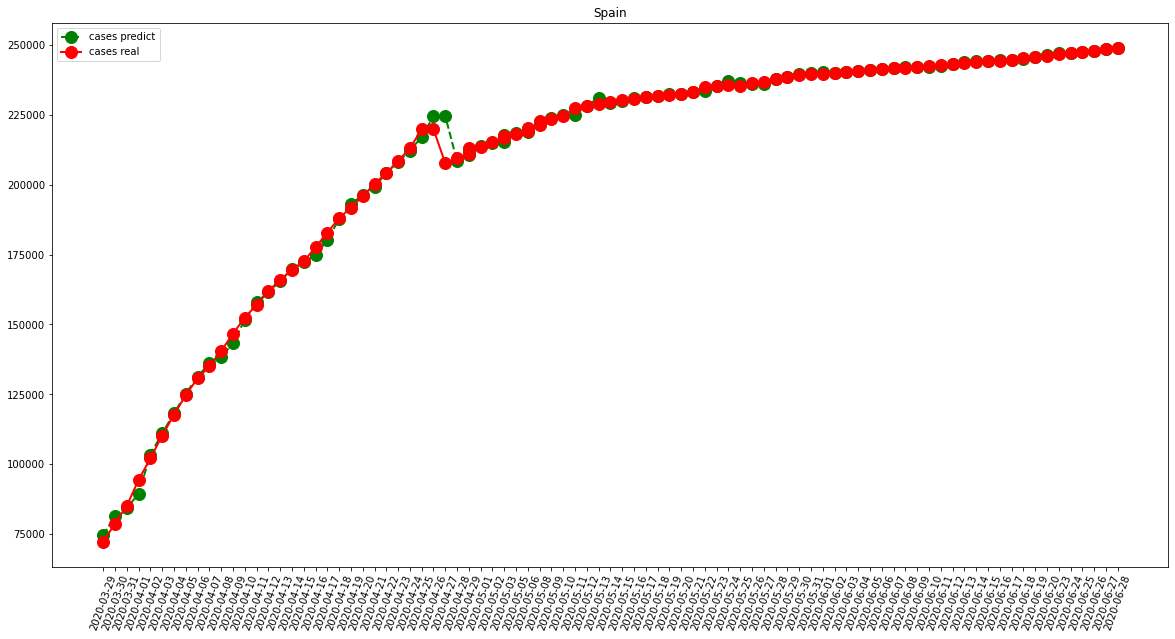

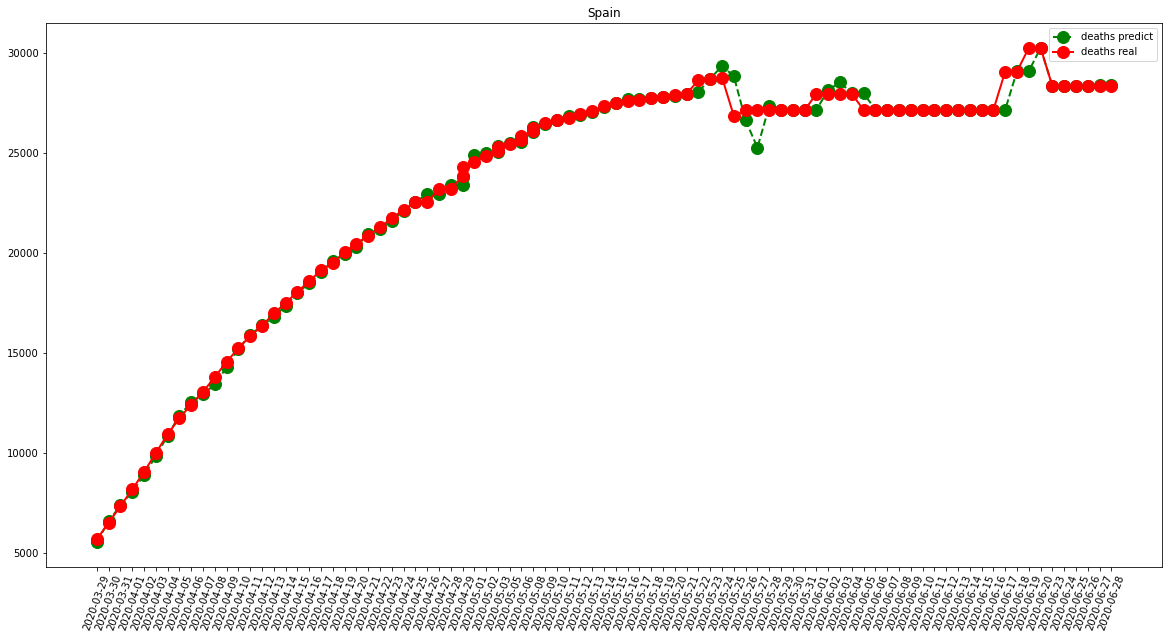

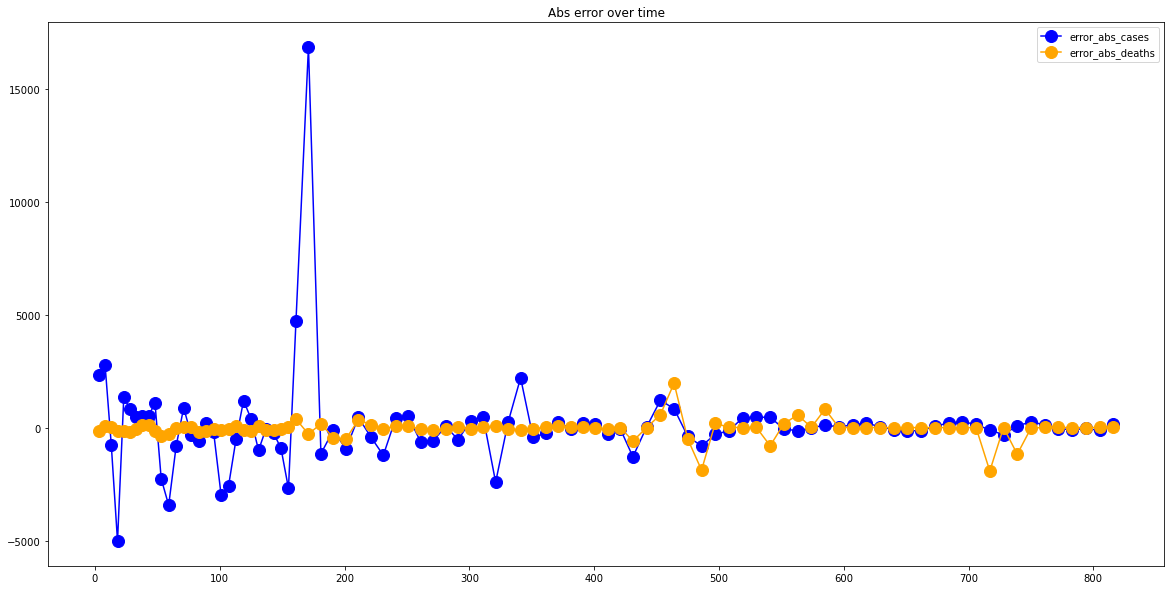

In [10]:
visShow("Spain")

-- United States performances for cases --
MAPE =  4707.010989010989
RMSE =  6497.8980658921755
-- United States performances for deaths --
MAPE =  547.7692307692307
RMSE =  804.5663701373828


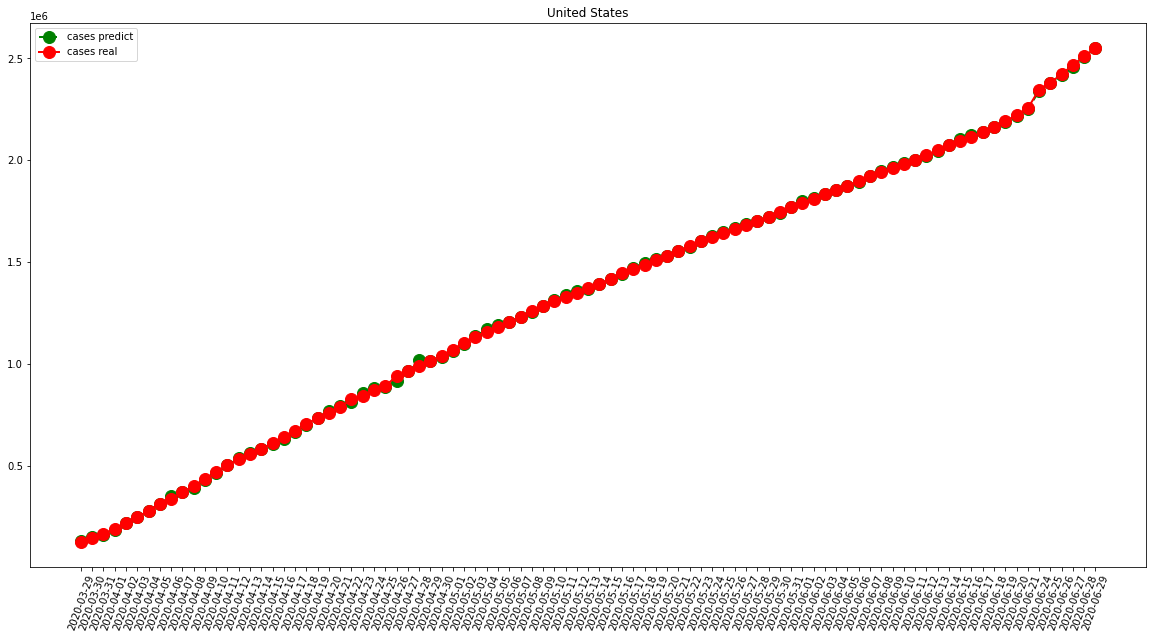

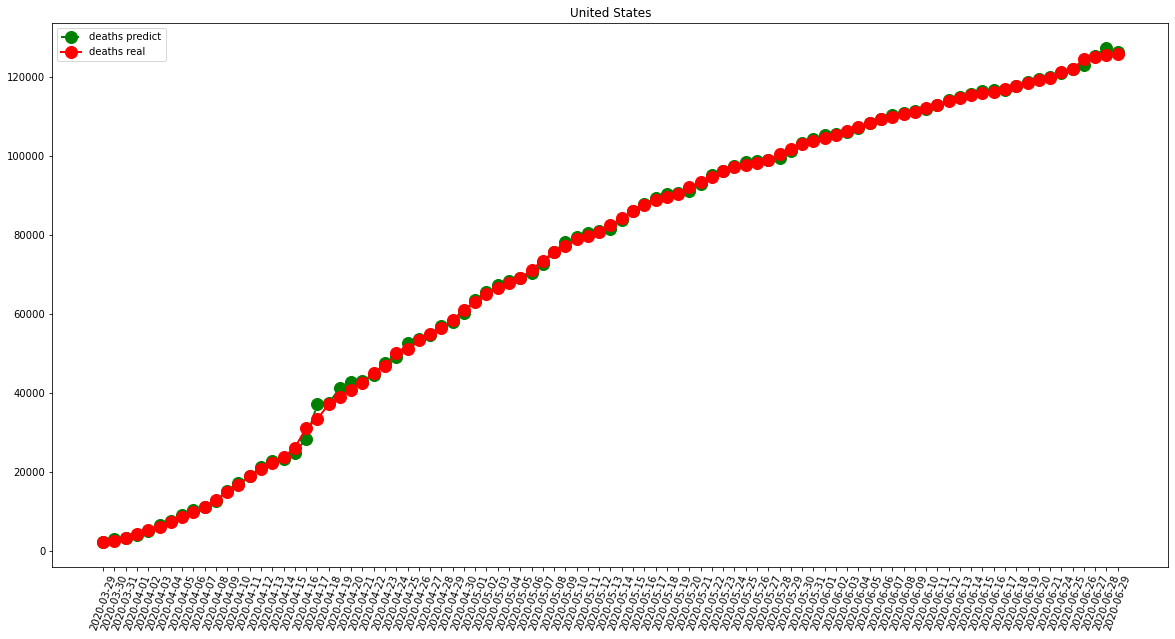

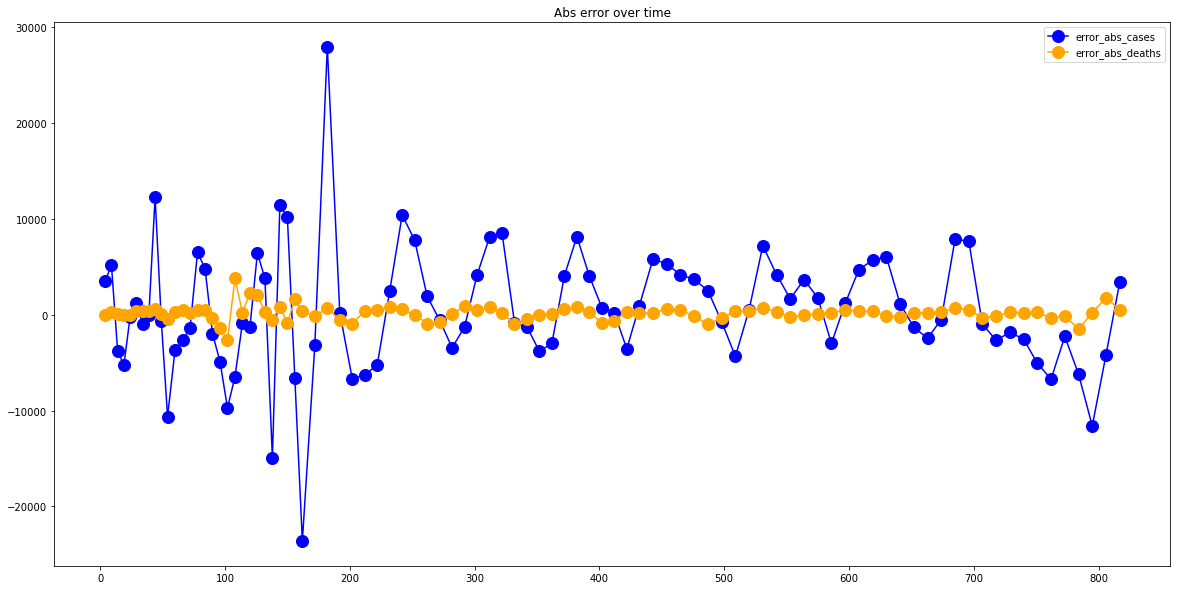

In [11]:
visShow("United States")

-- China performances for cases --
MAPE =  94.50549450549451
RMSE =  123.01809033410716
-- China performances for deaths --
MAPE =  41.252747252747255
RMSE =  164.50017535646487


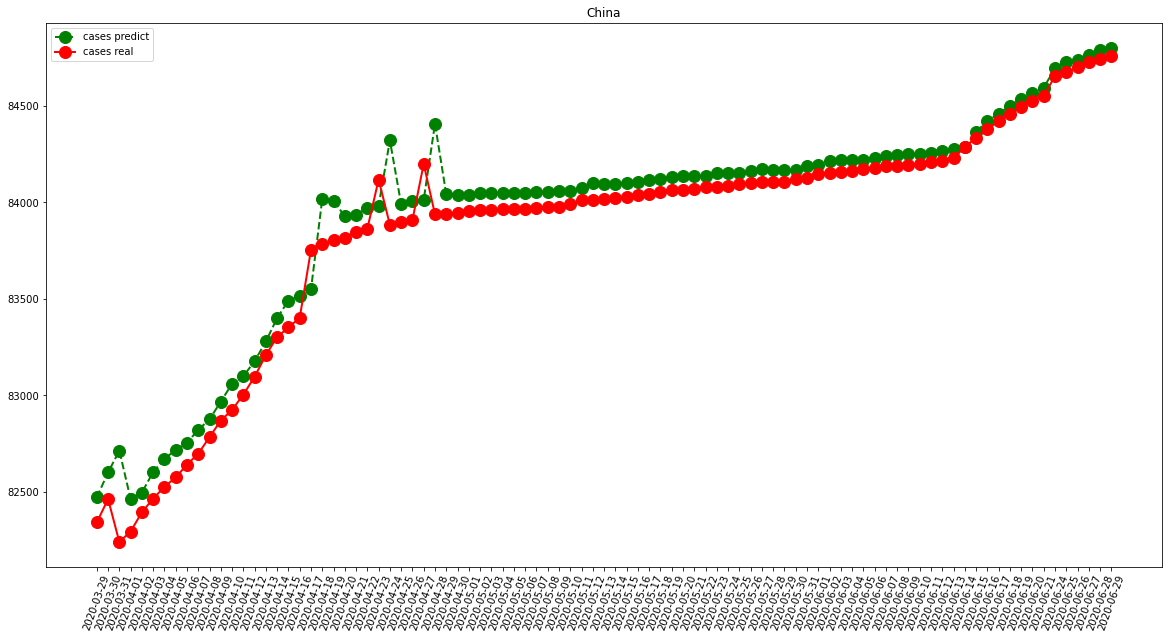

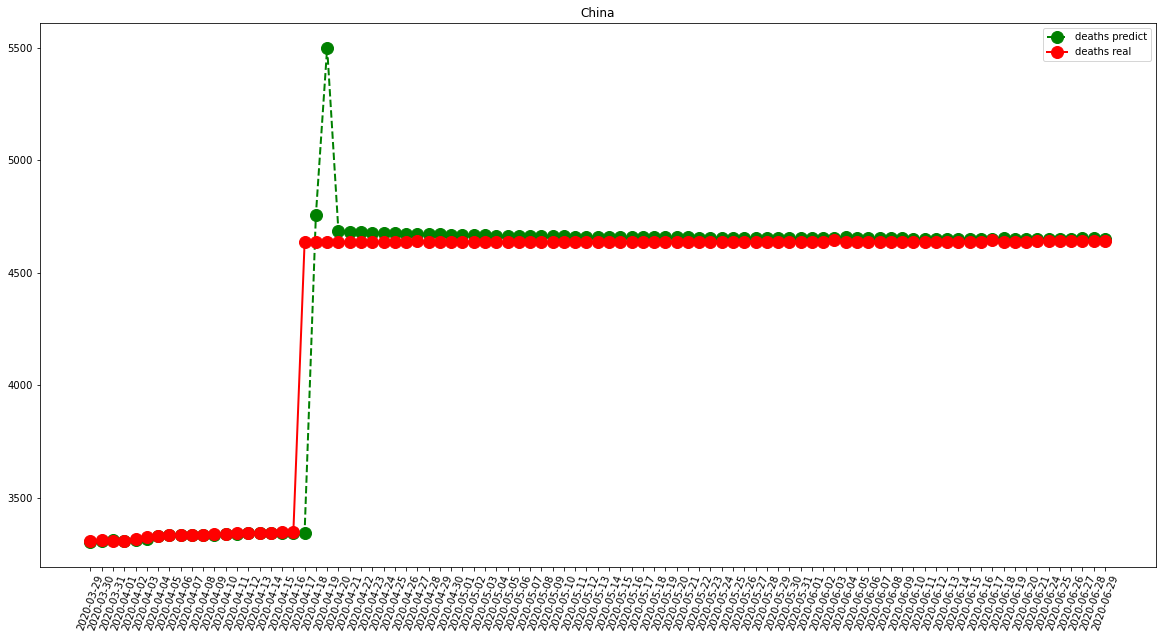

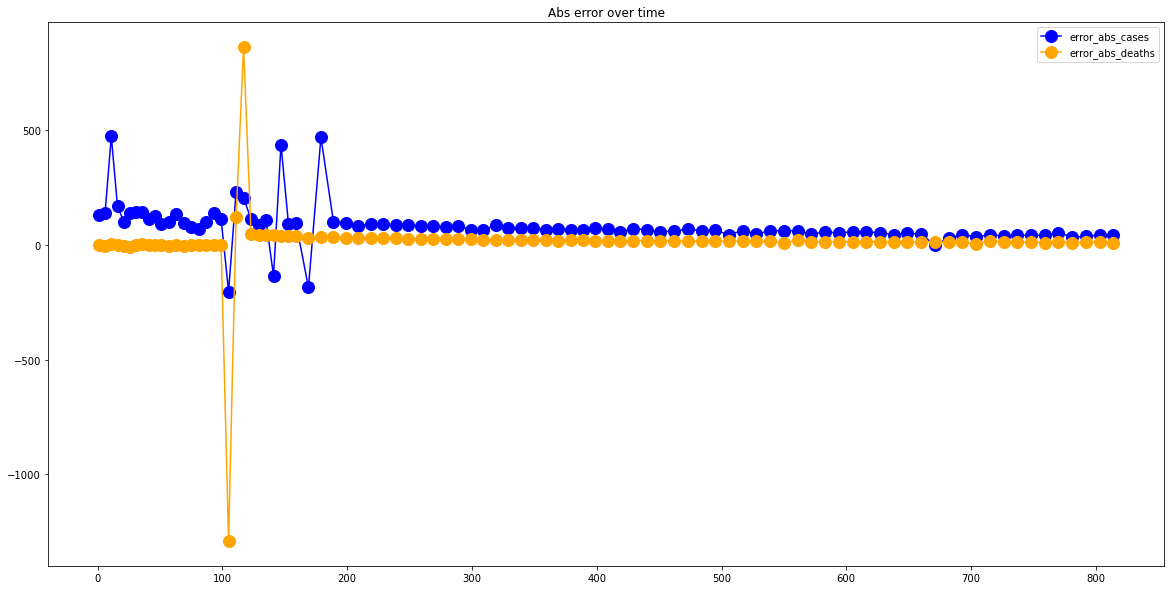

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAPE =  853.8412698412699
RMSE =  1185.3264904189432
-- United Kingdom performances for deaths --
MAPE =  264.8412698412698
RMSE =  615.0116917200688


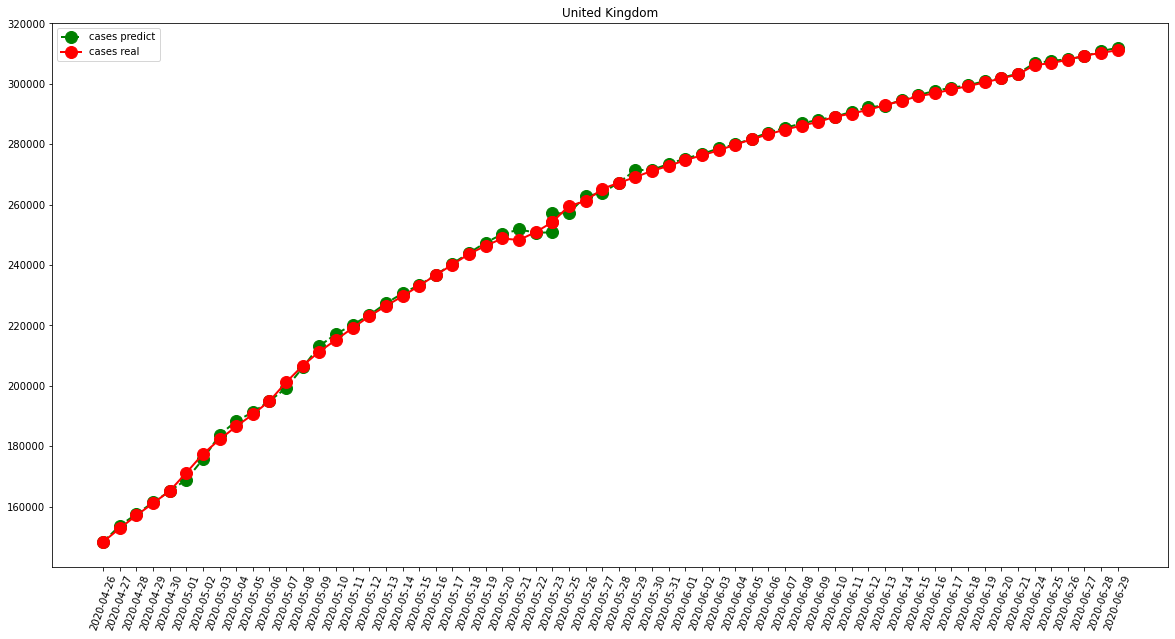

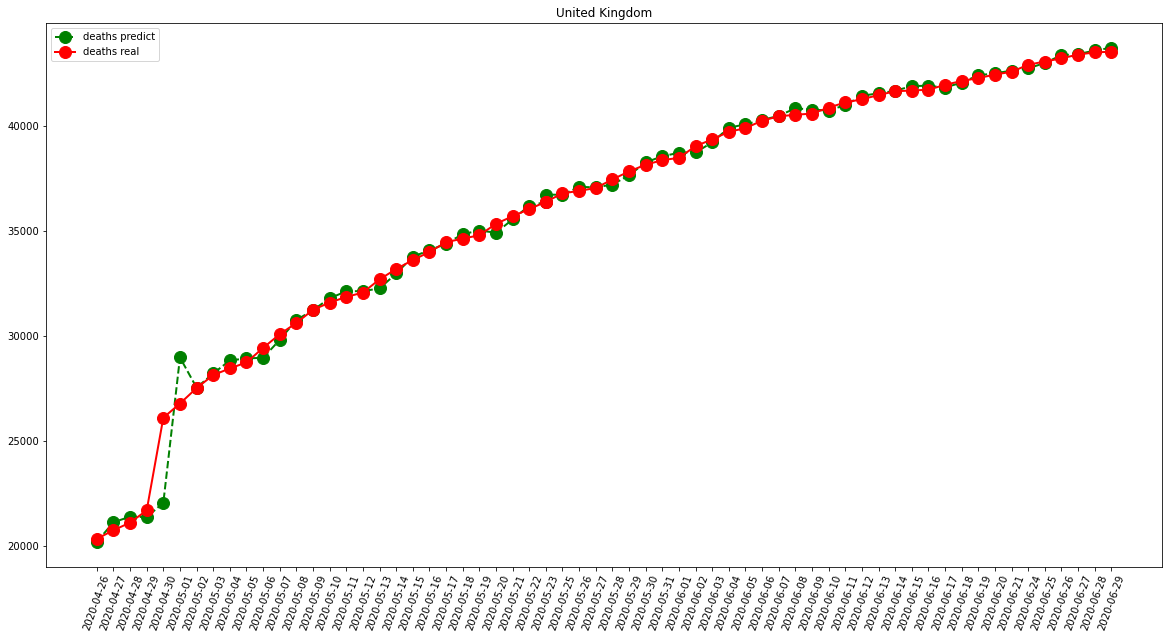

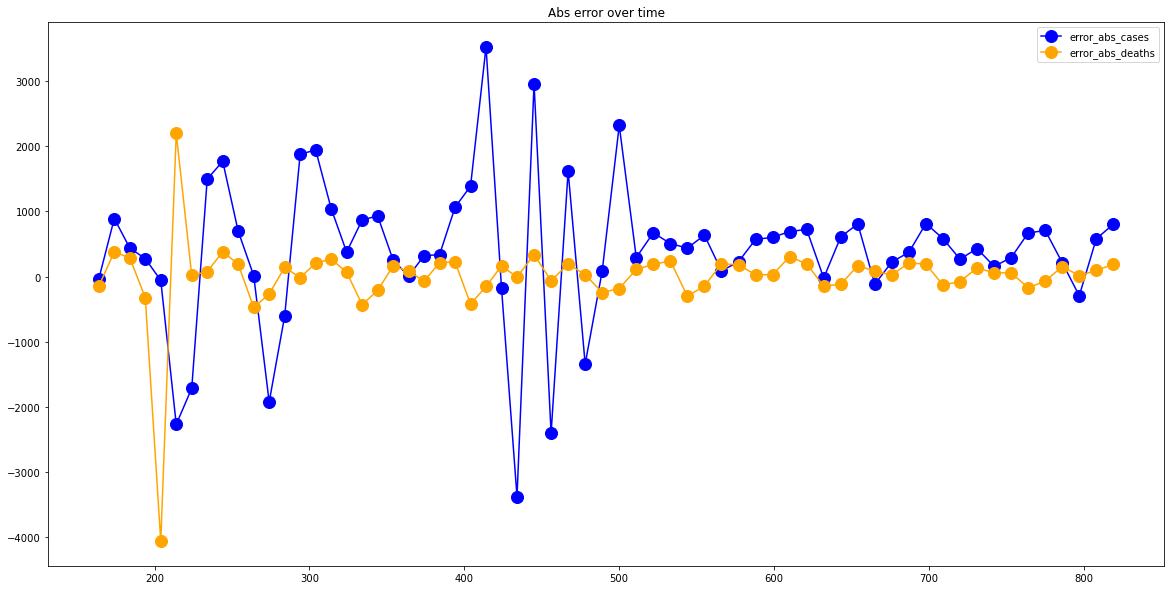

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAPE =  318.92063492063494
RMSE =  454.5556350952272
-- Germany performances for deaths --
MAPE =  34.23809523809524
RMSE =  54.633119788071575


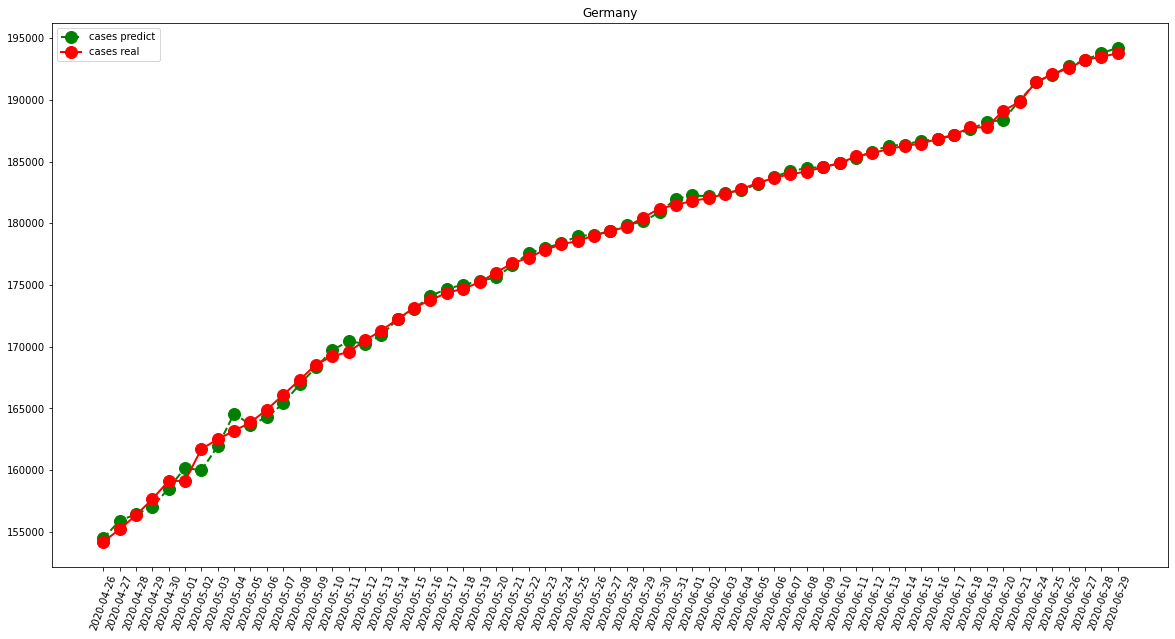

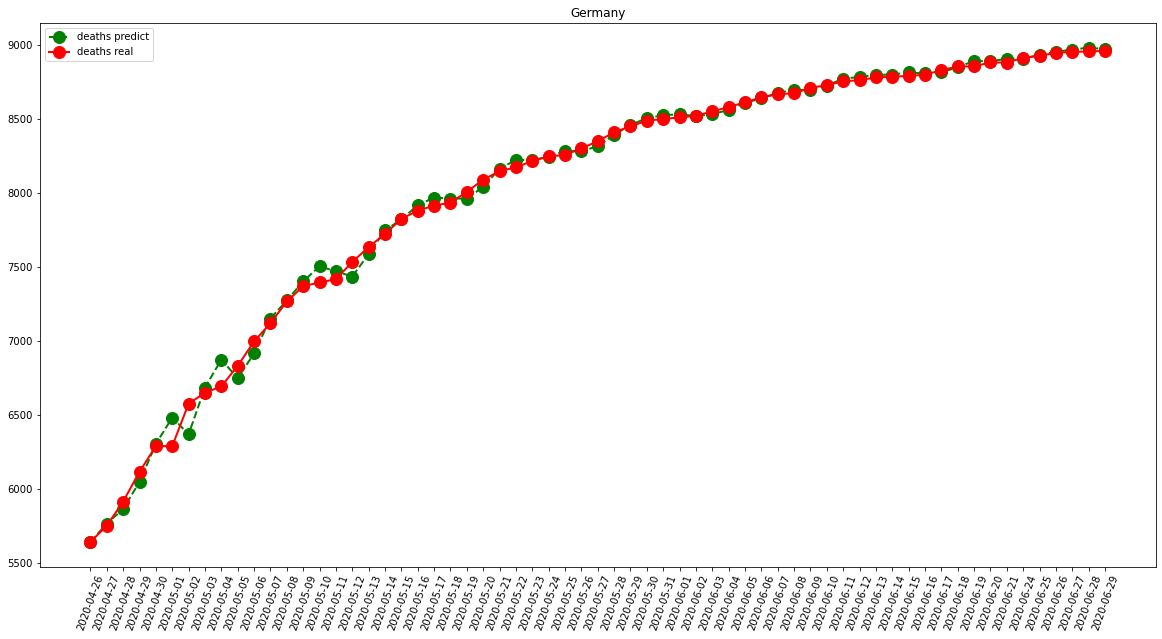

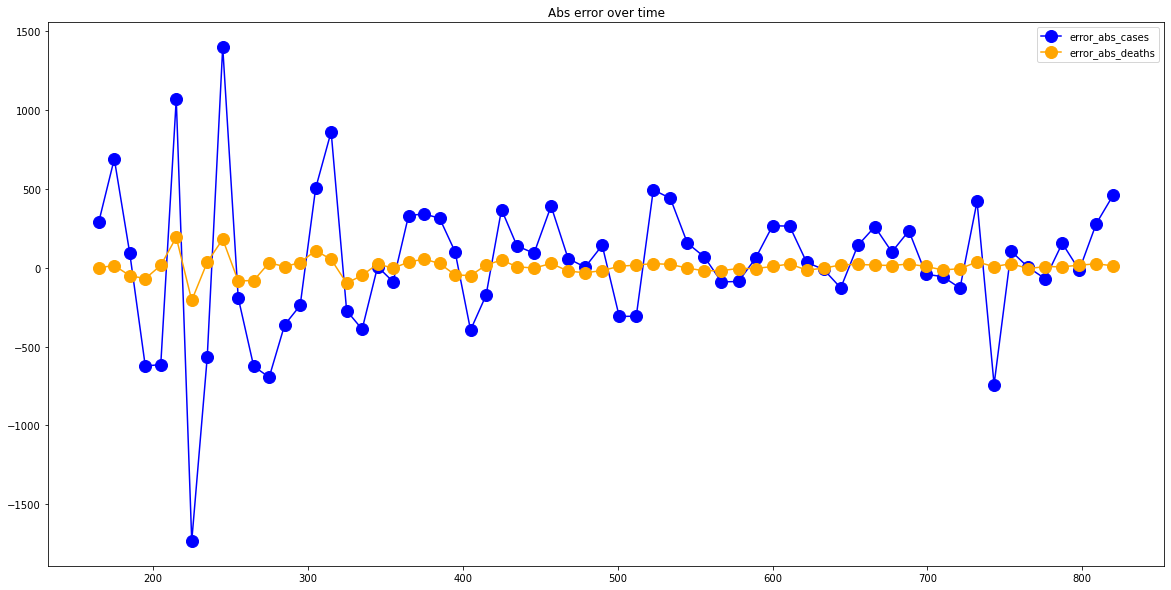

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAPE =  261.3015873015873
RMSE =  340.4133341913006
-- Iran performances for deaths --
MAPE =  17.841269841269842
RMSE =  30.078732664960448


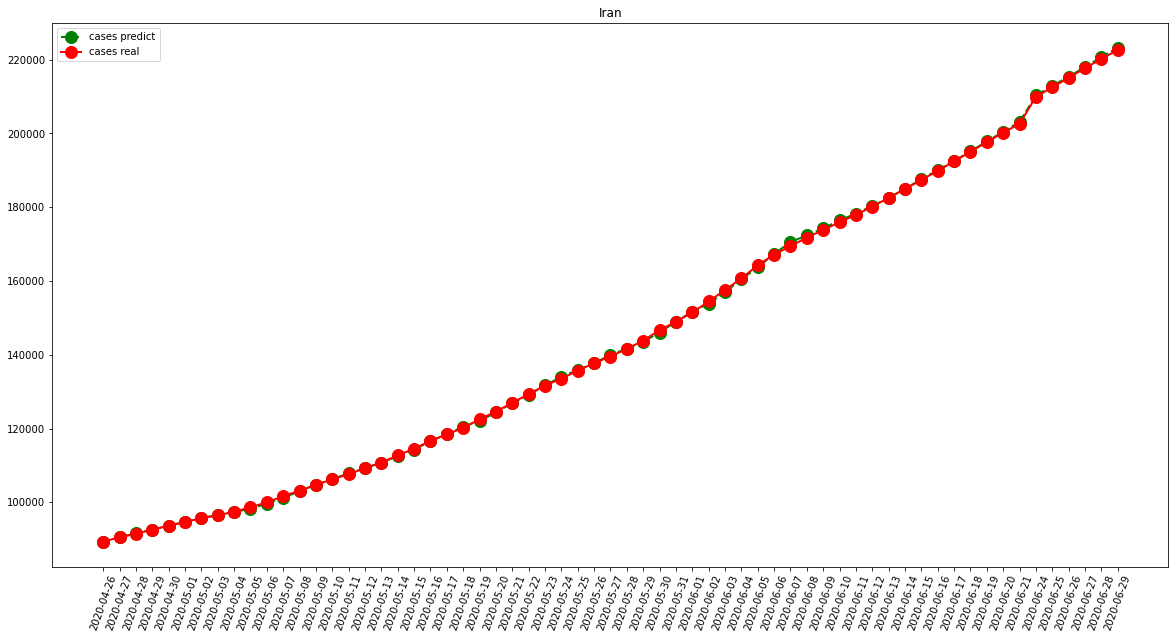

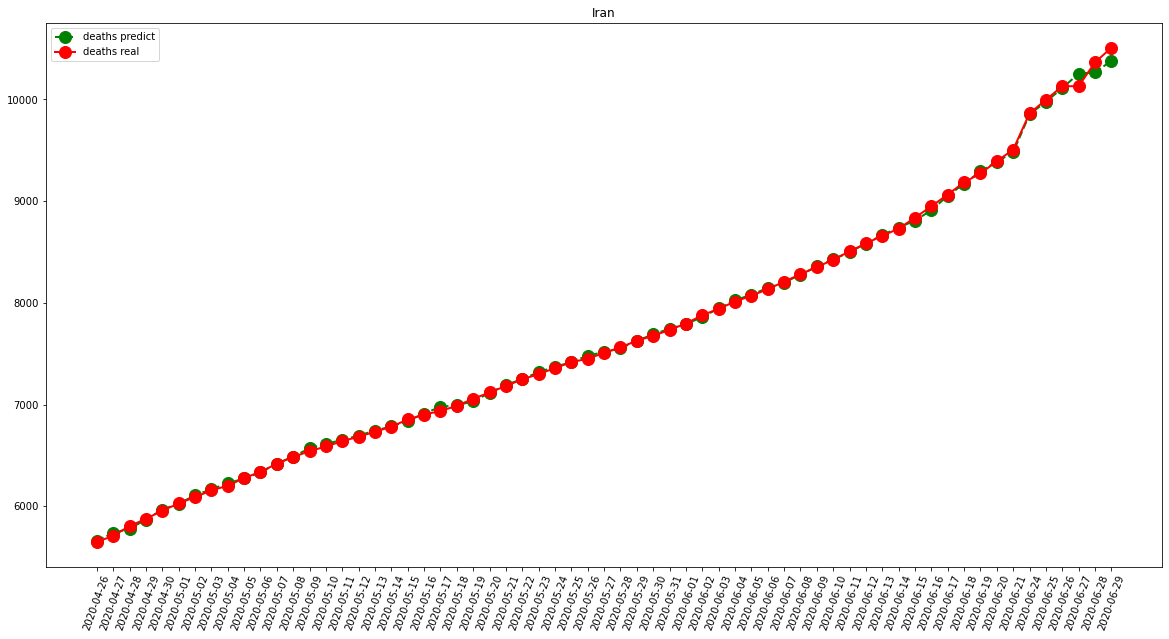

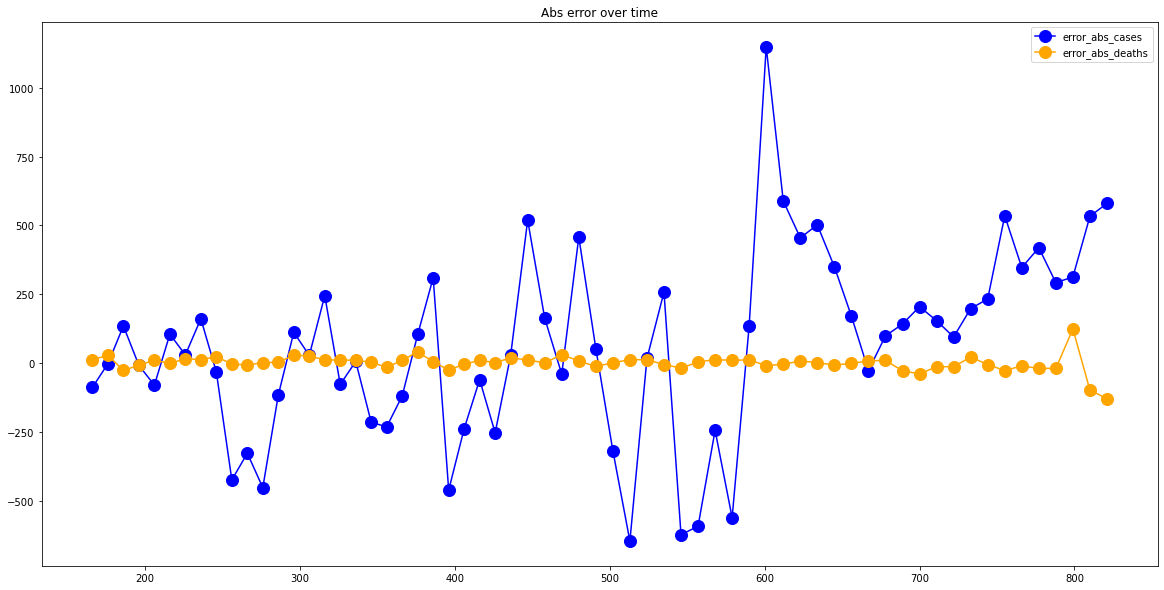

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAPE =  289.5238095238095
RMSE =  432.11429264115054
-- Turkey performances for deaths --
MAPE =  28.92063492063492
RMSE =  127.87779384525743


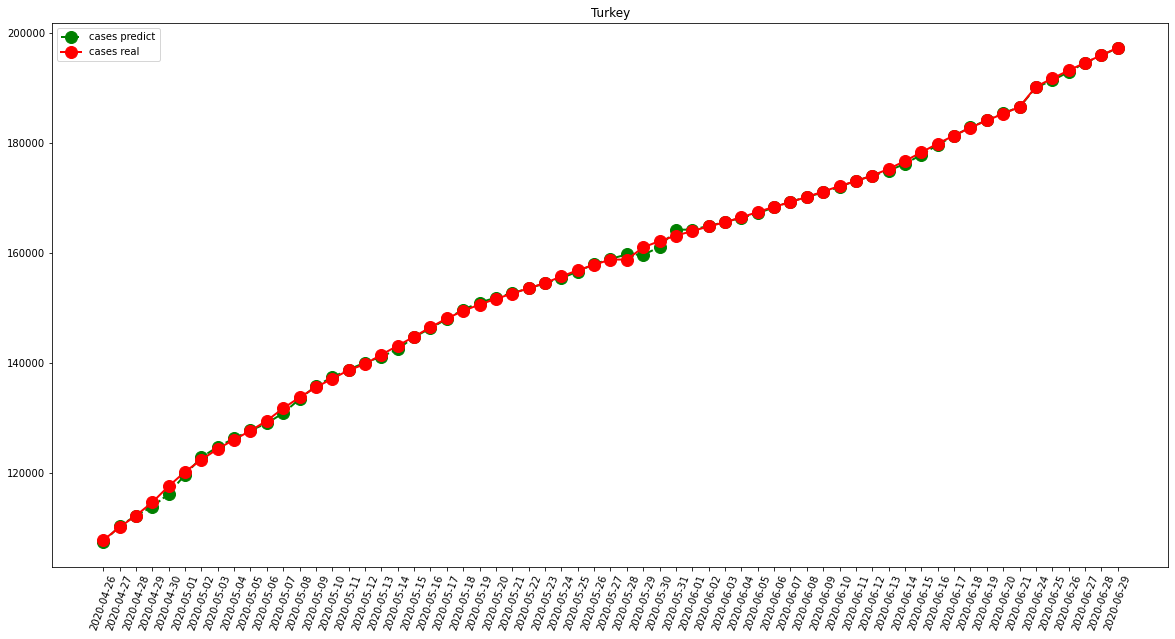

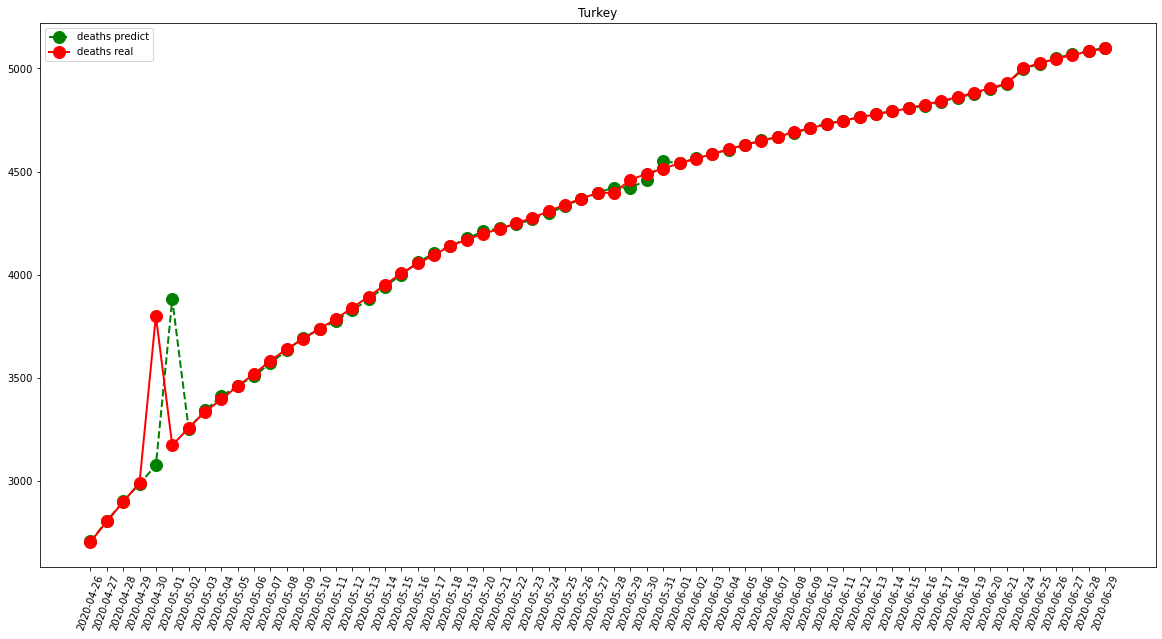

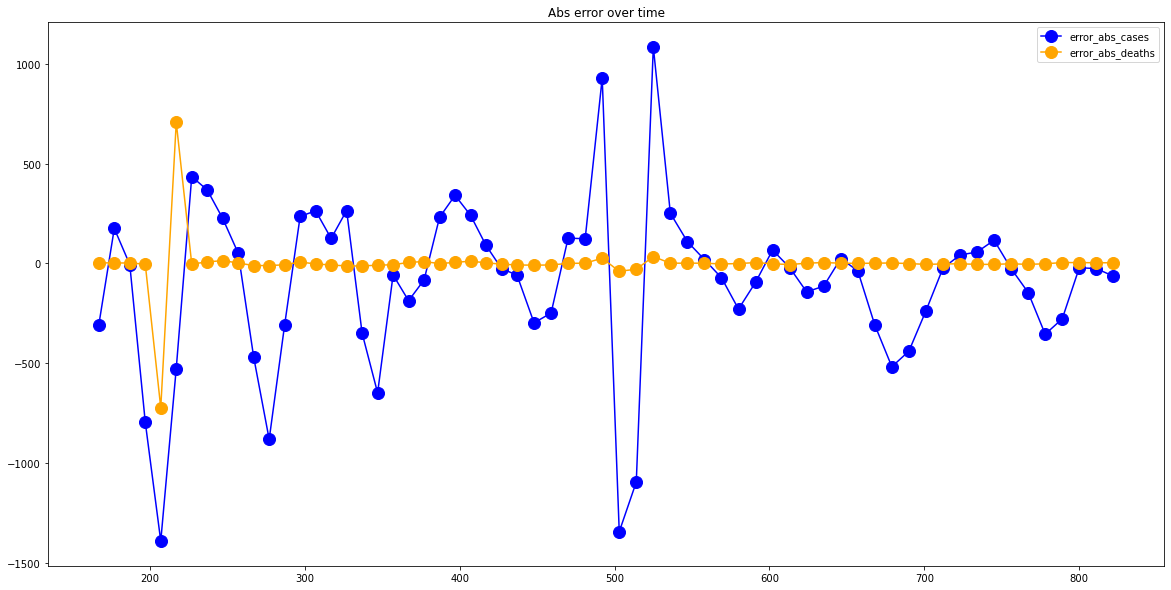

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAPE =  8351.5
RMSE =  10846.133842680227
-- Brazil performances for deaths --
MAPE =  384.6666666666667
RMSE =  473.87527660532976


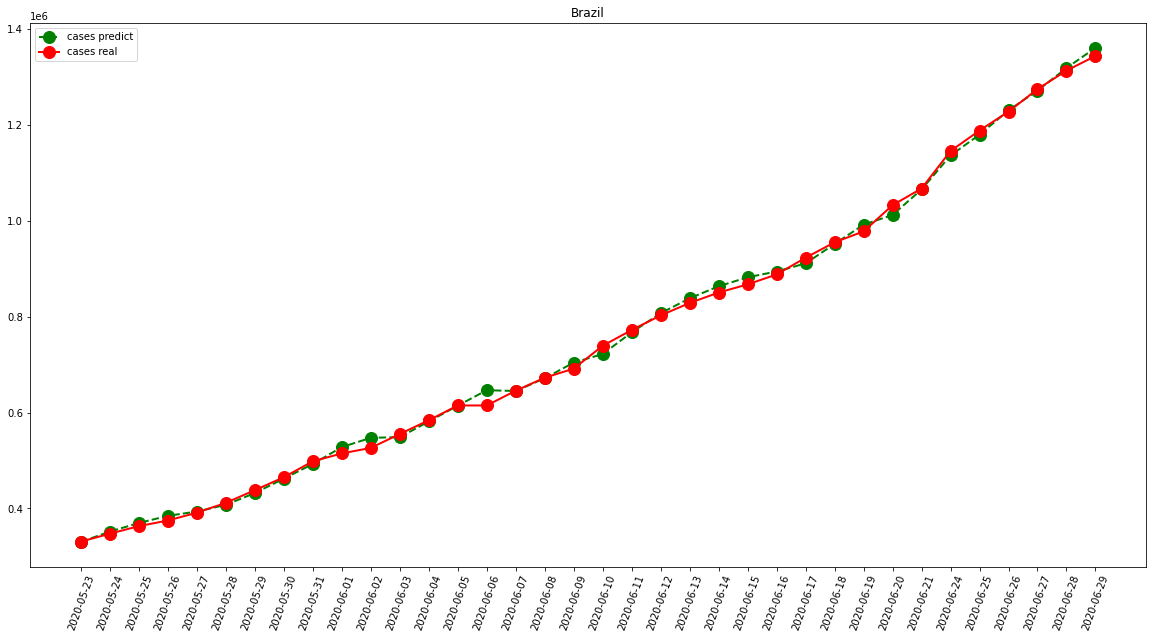

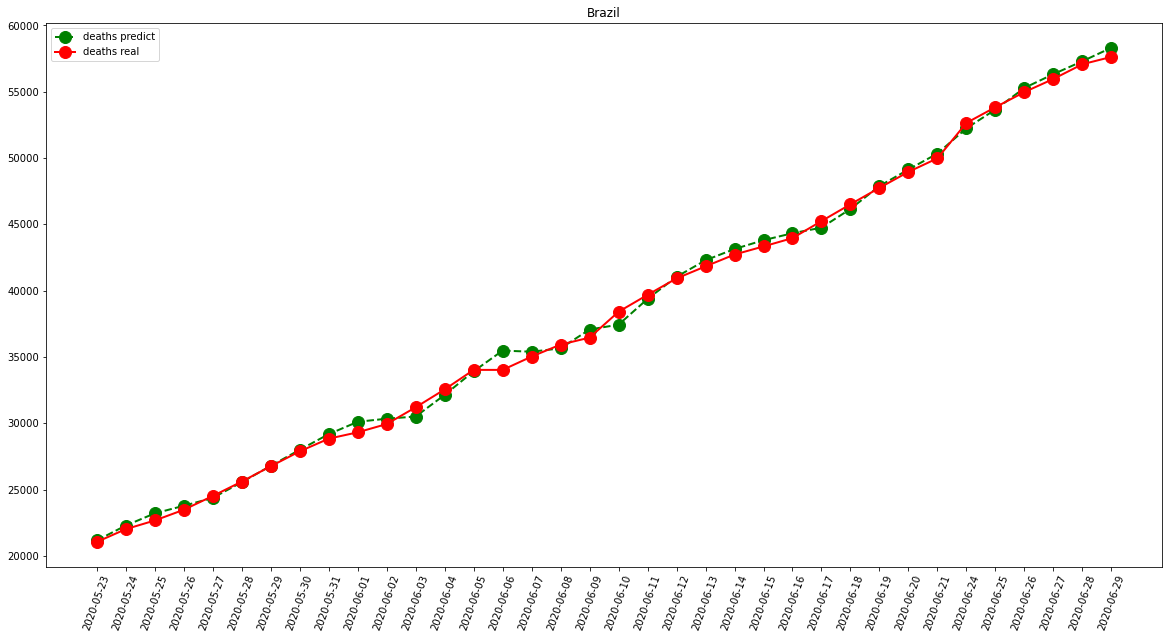

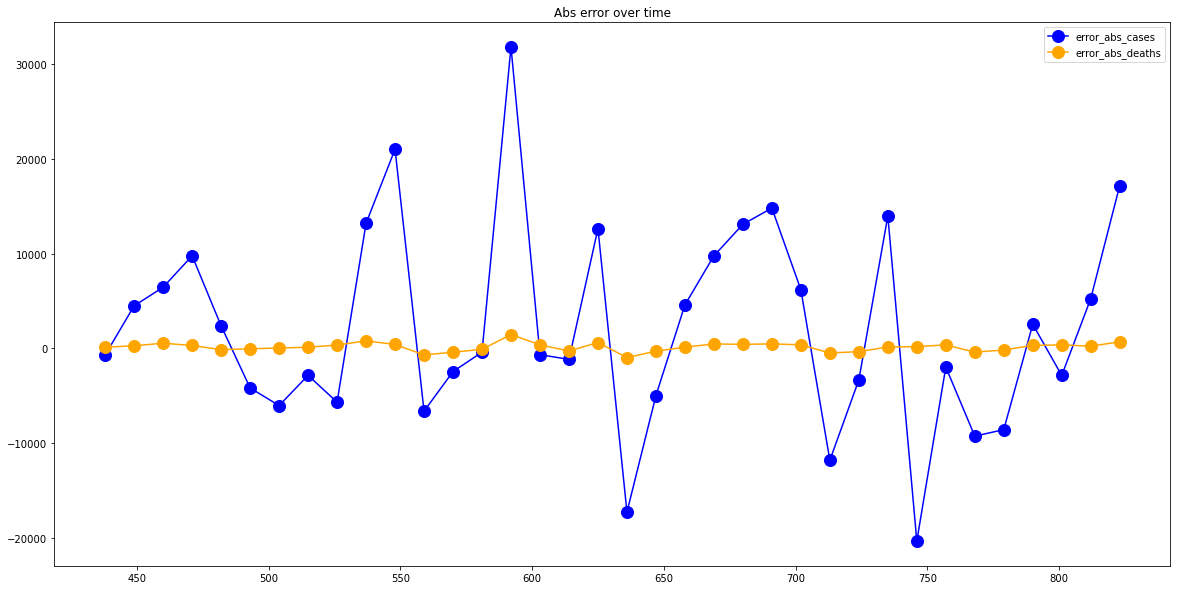

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)